# Ventilator inhale phase only

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
train = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\train.csv')
test = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\test.csv')

In [30]:
train_in = train[train.u_out == 0]
train_out = train[train.u_out == 1]

In [31]:
# verify all rows are there
print(train_out.shape[0] + train_in.shape[0])
print(train.shape[0])

6036000
6036000


In [32]:
train_in

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035945,6035946,125749,50,10,0.834147,1.869367,0,29.459013
6035946,6035947,125749,50,10,0.867574,2.154414,0,29.107502
6035947,6035948,125749,50,10,0.900917,1.304434,0,29.880825
6035948,6035949,125749,50,10,0.934309,1.733830,0,29.388710


In [75]:
# function to get single breath (id must exist...there are some that are missing)
# also once removed u_out=1, lengths are not always 30 (some 28, etc)
def get_breath(df,my_id):
    return df[df.breath_id == my_id] 


In [87]:
def plot_breath(df,my_id):
    id1 = get_breath(df,my_id)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    plt.figure(figsize=(8,5))
    plt.plot(id1.pressure,label='pressure')
    plt.plot(id1.u_in,label='u_in')
    plt.title(f'Pressure and u_in for Breath id={my_id}, R={r}, C={c}')
    plt.legend();

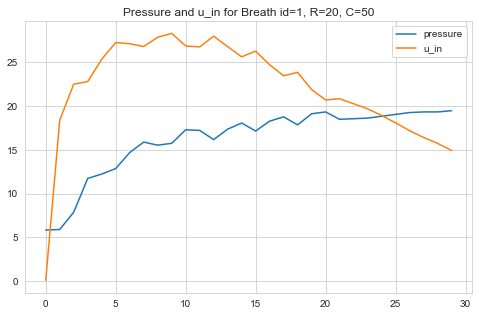

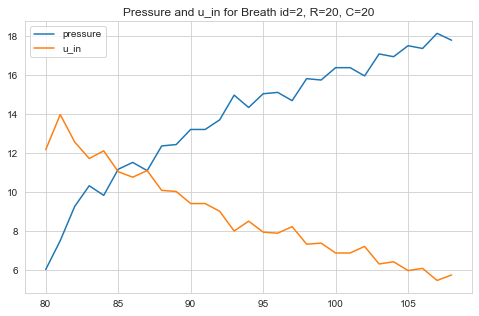

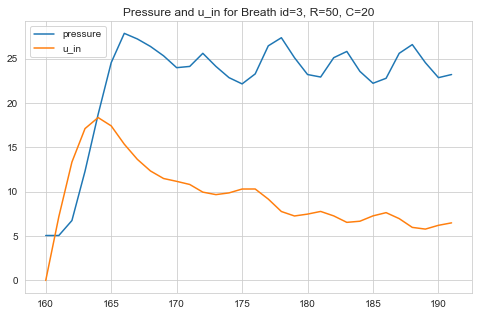

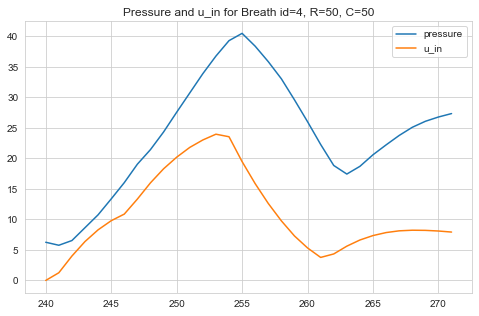

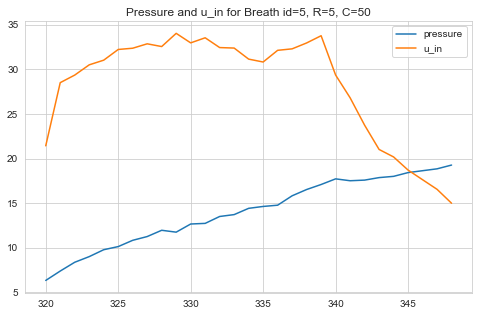

In [89]:
plot_breath(train_in,1)
plot_breath(train_in,2)
plot_breath(train_in,3)
plot_breath(train_in,4)
plot_breath(train_in,5)


In [118]:
breath_indicies = train_in.breath_id.unique()
breath_indicies

array([     1,      2,      3, ..., 125743, 125745, 125749], dtype=int64)

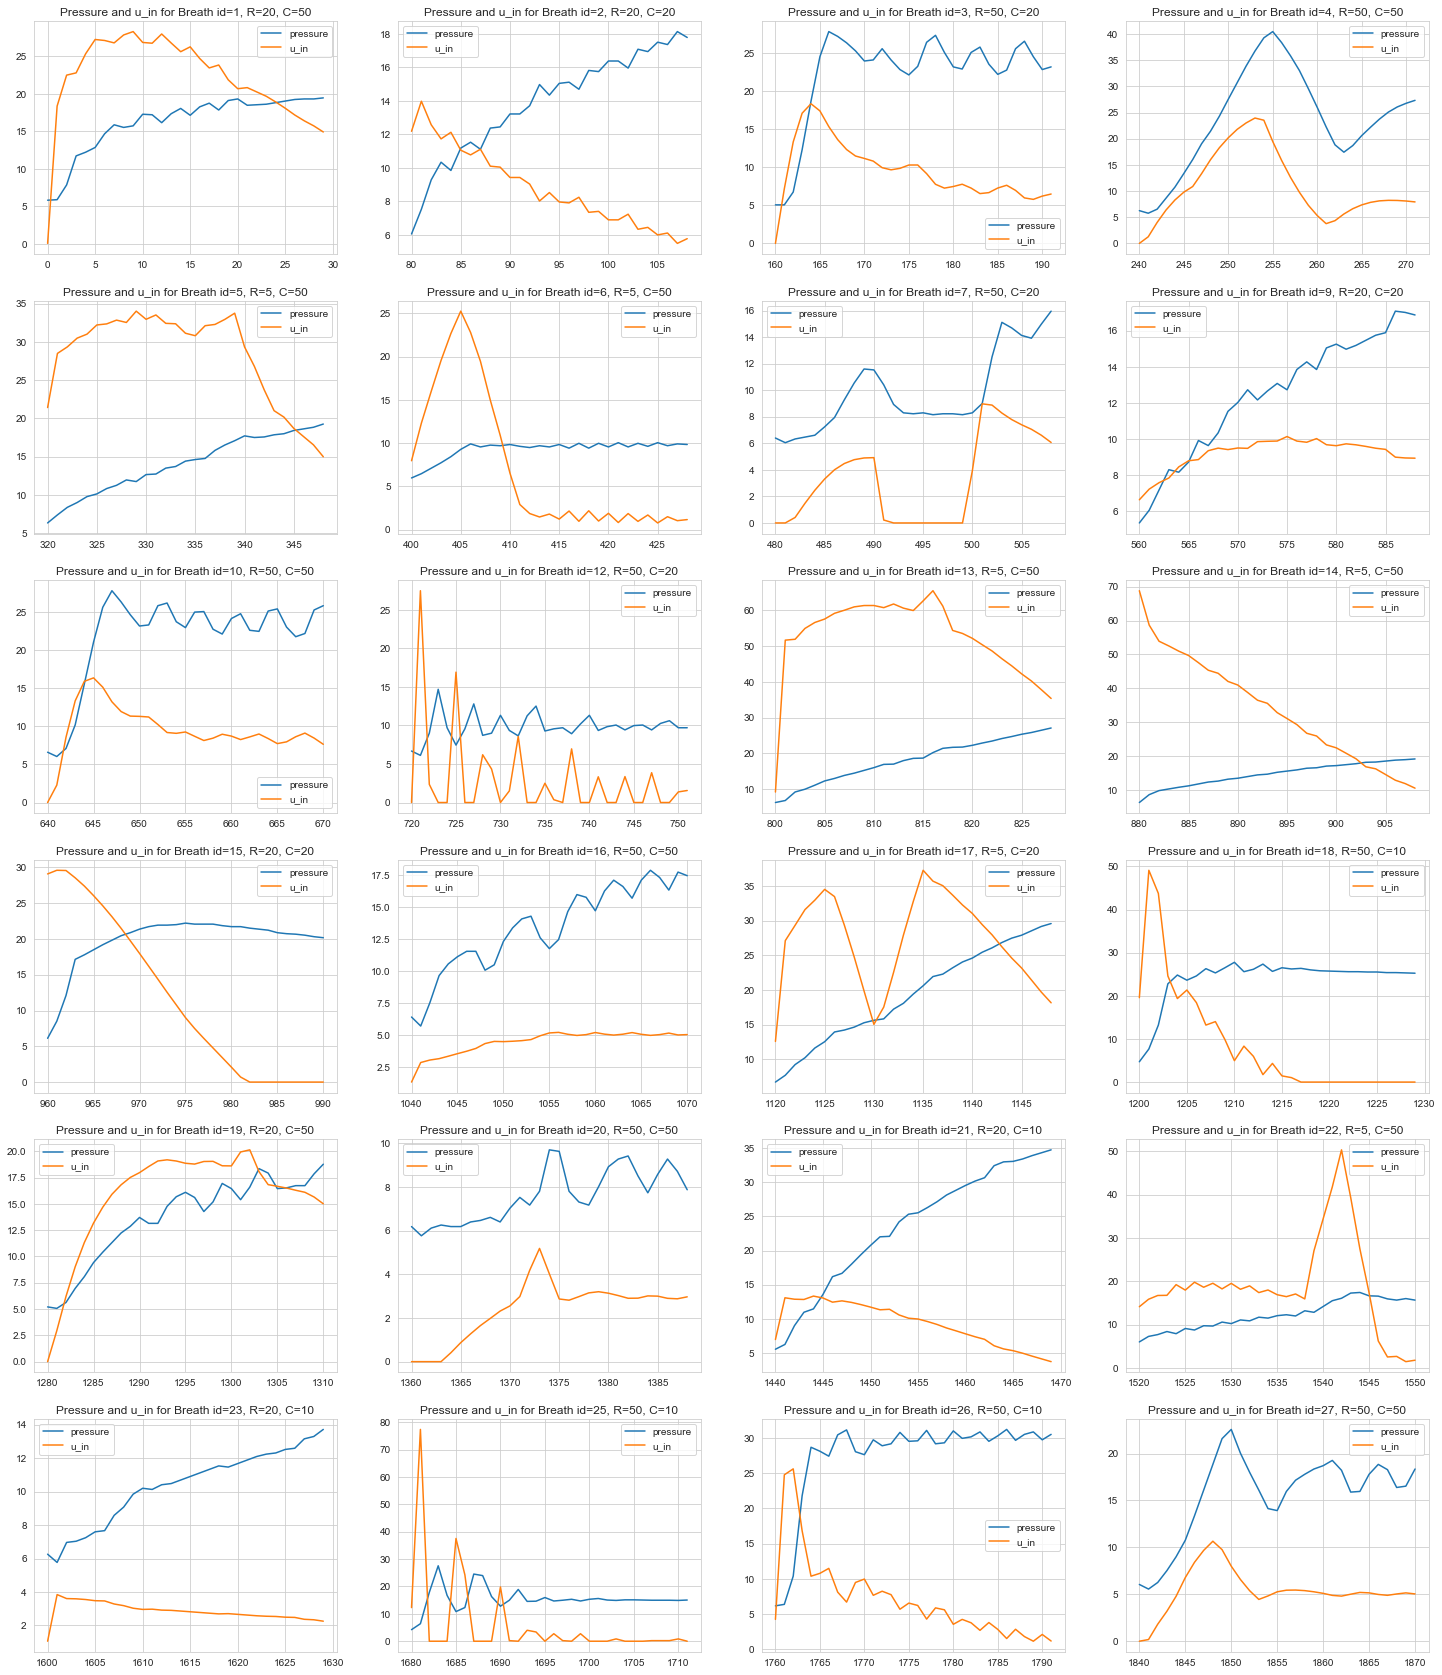

In [124]:
fig, ax = plt.subplots(6, 4, figsize=(25,30))
ax = ax.flatten()
count = 0
for i in breath_indicies[0:24]:
    id1 = get_breath(train_in,i)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    ax[count].plot(id1.pressure,label='pressure')
    ax[count].plot(id1.u_in,label='u_in')
    ax[count].set_title(f'Pressure and u_in for Breath id={i}, R={r}, C={c}')
    ax[count].legend();
    count +=1
plt.savefig('Inhale_only_first_24_plots.png')

Plot integrated u_in vs. max pressure

In [83]:
train_in.breath_id[train_in.breath_id==2].value_counts()

2    29
Name: breath_id, dtype: int64